## Exploratory Data Analysis (EDA)

### Analisis Inicial

En esta sección, vamos a explorar la información básica de nuestro conjunto de datos para tener una visión general de su estructura y características. Comenzaremos cargando el archivo y verificando algunas estadísticas clave, como las primeras filas, el tipo de datos y los valores únicos de algunas columnas relevantes.

In [26]:
import pandas as pd

df = pd.read_csv("raw_data.csv", sep=";")

import warnings
warnings.filterwarnings("ignore")

In [27]:
print(df.head())
print(df.info())
print(df.describe())
print(f"Las clases unicas de: {df["metodoObtencion"].unique()}")
print(f"Las clases unicas de: {df["energiaVertida_kWh"].unique()}")


           cups       fecha   hora consumo_kWh metodoObtencion  \
0  0114f2a9ef8e  2021/08/11  01:00       0,449             NaN   
1  0114f2a9ef8e  2021/08/11  02:00       0,423             NaN   
2  0114f2a9ef8e  2021/08/11  03:00       0,411             NaN   
3  0114f2a9ef8e  2021/08/11  04:00       0,282             NaN   
4  0114f2a9ef8e  2021/08/11  05:00       0,255             NaN   

  energiaVertida_kWh  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100969 entries, 0 to 2100968
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   cups                object
 1   fecha               object
 2   hora                object
 3   consumo_kWh         object
 4   metodoObtencion     object
 5   energiaVertida_kWh  object
dtypes: object(6)
memory usage: 96.2+ MB
None
                cups       fecha     hora consumo_k

### Limpieza y preprocesamiento de datos

Una vez que hemos explorado el dataset, procederemos a realizar algunas tareas de limpieza. Primero, reemplazaremos los valores NaN en la columna metodoObtencion con un valor predeterminado de "Desconocido". Además, eliminaremos la columna energiaVertida_kWh, ya que no será relevante para el análisis que vamos a realizar puesto que su valor es 0,00 siempre.

In [20]:
df['metodoObtencion'].fillna('Desconocido', inplace=True)
df.drop(columns=['energiaVertida_kWh'], inplace=True)
print(df.head())

           cups       fecha   hora consumo_kWh metodoObtencion
0  0114f2a9ef8e  2021/08/11  01:00       0,449     Desconocido
1  0114f2a9ef8e  2021/08/11  02:00       0,423     Desconocido
2  0114f2a9ef8e  2021/08/11  03:00       0,411     Desconocido
3  0114f2a9ef8e  2021/08/11  04:00       0,282     Desconocido
4  0114f2a9ef8e  2021/08/11  05:00       0,255     Desconocido


Voy a especificar los tipos de datos del dataset porque es una buena práctica. Actualmente, todas las columnas están como object, lo que significa que pandas las trata como texto. Esto no es ideal, especialmente para las columnas numéricas y de fecha, ya que dificulta el análisis. Convertiré las columnas de fecha a datetime, y las numéricas a float, para facilitar el trabajo con los datos.

In [25]:
import pandas as pd

# Leer el archivo CSV
df = pd.read_csv("raw_data.csv", sep=";")

# Intentar convertir la columna 'fecha' a tipo datetime, mostrando errores
df['fecha_converted'] = pd.to_datetime(df['fecha'], errors='coerce')  # Si hay errores, se pondrán como NaT

# Filtrar las filas donde la conversión ha fallado (NaT)
invalid_dates = df[df['fecha_converted'].isna()]

# Mostrar las fechas que no se han podido convertir
print("Fechas que no se pudieron convertir:")
print(invalid_dates['fecha'].unique())  # Muestra las fechas originales con formato distinto

# Mostrar las primeras filas del dataframe para verificar el resultado
print(df.head())


Fechas que no se pudieron convertir:
['13/08/2021' '14/08/2021' '15/08/2021' '16/08/2021' '17/08/2021'
 '18/08/2021' '19/08/2021' '20/08/2021' '21/08/2021' '22/08/2021'
 '23/08/2021' '24/08/2021' '25/08/2021' '26/08/2021' '27/08/2021'
 '28/08/2021' '29/08/2021' '30/08/2021' '31/08/2021' '13/09/2021'
 '14/09/2021' '15/09/2021' '16/09/2021' '17/09/2021' '18/09/2021'
 '19/09/2021' '20/09/2021' '21/09/2021' '22/09/2021' '23/09/2021'
 '24/09/2021' '25/09/2021' '26/09/2021' '27/09/2021' '28/09/2021'
 '29/09/2021' '30/09/2021' '13/10/2021' '14/10/2021' '15/10/2021'
 '16/10/2021' '17/10/2021' '18/10/2021' '19/10/2021' '20/10/2021'
 '21/10/2021' '22/10/2021' '23/10/2021' '24/10/2021' '25/10/2021'
 '26/10/2021' '27/10/2021' '28/10/2021' '29/10/2021' '30/10/2021'
 '31/10/2021' '13/11/2021' '14/11/2021' '15/11/2021' '16/11/2021'
 '17/11/2021' '18/11/2021' '19/11/2021' '20/11/2021' '21/11/2021'
 '22/11/2021' '23/11/2021' '24/11/2021' '25/11/2021' '26/11/2021'
 '27/11/2021' '28/11/2021' '29/11/2021'

In [23]:
df['fecha'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y')
df['consumo_kWh'] = pd.to_numeric(df['consumo_kWh'], errors='coerce')
df['metodoObtencion'] = df['metodoObtencion'].astype('category')

print(df.dtypes)
print(df.head())

ValueError: time data "2021/08/11" doesn't match format "%d/%m/%Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

### Visualización de las distribuciones de consumo eléctrico

A continuación, realizaremos un análisis de la serie temporal para una vivienda específica. Esto nos permitirá observar cómo se distribuye el consumo eléctrico a lo largo del tiempo y detectar posibles patrones, tendencias o picos en su comportamiento. Utilizaremos Matplotlib para visualizar los datos y obtener una mejor comprensión de la evolución del consumo eléctrico de la vivienda.


C:\Users\tipir\AppData\Local\Temp\ipykernel_16348\3390218356.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_mensual = df_cups.resample('M', on='fecha')['consumo_kWh'].sum().reset_index()


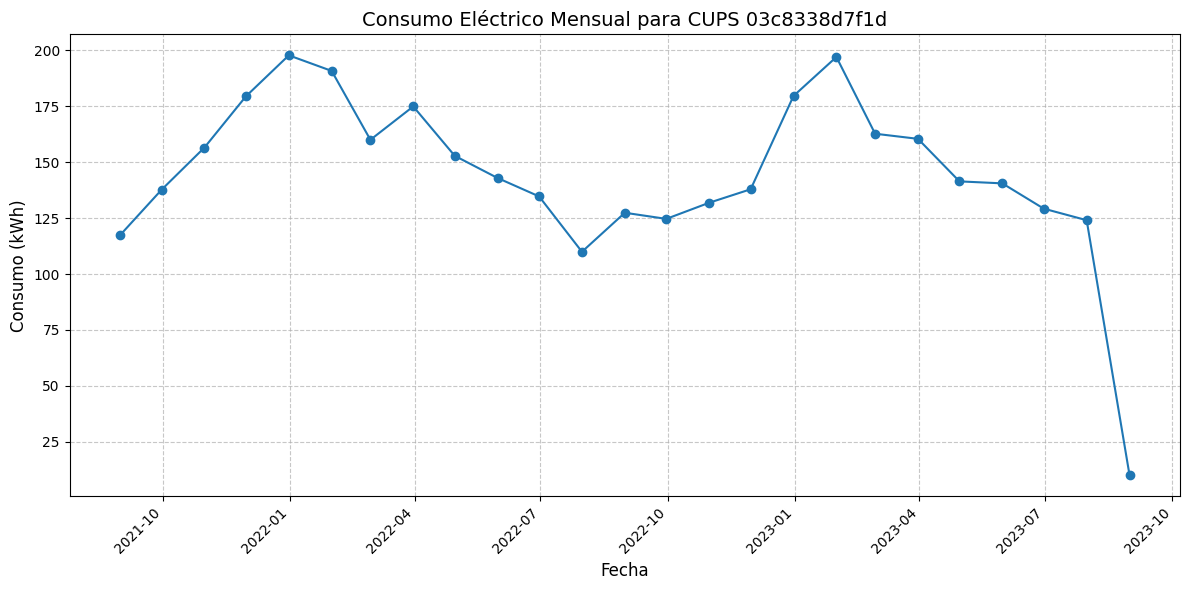

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter

# Filtrar y preparar los datos
cups_especifico = '03c8338d7f1d'
df_cups = df[df['cups'] == cups_especifico].copy()

# Verificar si hay datos
if df_cups.empty:
    raise ValueError(f"No hay datos para el CUPS {cups_especifico}")

# 1. Corregir formato de fecha (las fechas son YYYY/MM/DD)
df_cups['fecha'] = pd.to_datetime(df_cups['fecha'], format='%Y/%m/%d')  # Formato correcto

# 2. Convertir "consumo_kWh" a numérico (las comas son decimales)
df_cups['consumo_kWh'] = df_cups['consumo_kWh'].str.replace(',', '.').astype(float)

# Ordenar por fecha
df_cups = df_cups.sort_values('fecha')

# 3. Agrupar por mes si necesitas una vista mensual (opcional)
df_mensual = df_cups.resample('M', on='fecha')['consumo_kWh'].sum().reset_index()

# Configurar la gráfica (versión mensual)
plt.figure(figsize=(12, 6))
plt.plot(df_mensual['fecha'], df_mensual['consumo_kWh'], marker='o', linestyle='-', color='tab:blue')
plt.title(f'Consumo Eléctrico Mensual para CUPS {cups_especifico}', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Consumo (kWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Formatear eje X para mostrar año-mes
date_format = DateFormatter("%Y-%m")
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Consumo por hora del día: Puedes agregar los datos por hora para analizar cómo varía el consumo según el momento del día.

In [ ]:
df['hora'] = pd.to_datetime(df['hora'], format='%H:%M').dt.hour
df.groupby('hora')['consumo_kWh'].mean().plot(kind='bar')
plt.title('Promedio de Consumo Eléctrico por Hora del Día')
plt.xlabel('Hora')
plt.ylabel('Consumo Promedio (kWh)')
plt.show()


Consumo por fecha: Puedes analizar cómo varía el consumo a lo largo de los días o meses.

In [ ]:
df.groupby(df['fecha'].dt.month)['consumo_kWh'].mean().plot(kind='bar')
plt.title('Consumo Eléctrico Promedio por Mes')
plt.xlabel('Mes')
plt.ylabel('Consumo Promedio (kWh)')
plt.show()


Si tienes más variables que afectan el consumo eléctrico (como el método de obtención de energía o la energía vertida), es importante explorar cómo se relacionan entre sí.

Puedes utilizar un heatmap de correlación para ver relaciones entre variables:

In [ ]:
import seaborn as sns
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlación de Variables')
plt.show()


Verifica si hay valores atípicos en el consumo eléctrico que podrían afectar el clustering.

In [ ]:
sns.boxplot(df['consumo_kWh'])
plt.title('Detección de Outliers en Consumo Eléctrico')
plt.show()


Si tienes varias viviendas (diferentes CUPS), puede ser útil realizar un análisis de agrupamiento por vivienda para ver si hay patrones de consumo comunes entre viviendas similares. Esto te ayudará más adelante en el proceso de clustering.

Puedes analizar si existen patrones estacionales o de consumo diario.

In [ ]:
df.groupby('cups')['consumo_kWh'].mean().sort_values(ascending=False).head()
